En este cuaderno realizaremos un análisis de las tendencias musicales desde 1921 hasta la actualidad, utilizando datasets provenientes de Spotify.

Por un lado, hemos desarrolado un script en Python para obtener todas las canciones entre 2020 y 2023 mediante el acceso al API de Spotify. Puede acceder al repositorio donde se encuentra todo lo que hemos desarrollado y utilizado en el siguiente enlace: https://github.com/Mormur22/SpotifyRecomendator

Por otro lado , el otro dataset lo obtuvimos de Kaggle, el cual recopila canciones desde 1921 hasta 2020: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset. La razón de utilizar este data set en lugar de utilizar api de spotify es debido a la limitación de api de spotify, el cual no permite obtener más de 1000 canciones para un año determinado adecuadamente, y que además nos brinda una muestra más amplia.

Antes de comenzar con el análisis, vamos a observar cómo están representados estos datos.

In [69]:
import pandas as pd
df_tk = pd.read_csv('data1921-2023.csv')

d:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [70]:
print(df_tk.head())

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

En el dataset que vamos a utilizar para nuestro análisis de tendencias musicales, podemos observar las siguientes columnas:

- Valence: un valor numérico que representa la positividad de la canción, oscilando entre 0 y 1 (siendo 1 la más positiva y 0 la más negativa).
- Year: el año en que se lanzó la canción.
- Acousticness: un valor numérico que representa la cantidad de elementos acústicos de la canción, oscilando entre 0 y 1 (siendo 1 la pista más acústica y 0 la menos acústica).
- Artists: un campo de texto que enumera los artistas que contribuyeron a la canción.
- Danceability: un valor numérico que representa la bailabilidad de la canción, oscilando entre 0 y 1 (siendo 1 la pista más bailable y 0 la menos bailable).
- Duration_ms: el tiempo en milisegundos que dura la canción.
- Energy: un valor numérico que representa la intensidad y actividad de la canción, oscilando entre 0 y 1 (siendo 1 la pista más enérgica y 0 la menos enérgica).
- Explicit: un valor booleano que indica si la canción contiene lenguaje explícito o no.
- ID: un identificador único para la canción.
- Instrumentalness: un valor numérico que representa la instrumentalidad de la canción, oscilando entre 0 y 1 (siendo 1 la pista más instrumental y 0 la menos instrumental).
- Key: el tono de la canción, representado por valores numéricos del 0 al 11, que corresponden a las 12 notas de la escala musical.
- Liveness: un valor numérico que describe la probabilidad de que la canción haya sido grabada con público en directo canción.
- Loudness: un valor numérico que representa intensidad de la canción en db, oscilando entre -60 y 0 decibeles (dB).
- Mode: un valor numérico que indica si la canción está en modo mayor o menor, representado por 0 y 1 respectivamente.
- Name: el título de la canción.
- Popularity: un valor numérico que representa la popularidad de la canción en Spotify, oscilando entre 0 y 100 (siendo 100 la pista más popular).
- Release Date: la fecha en que se lanzó la canción.
- Speechiness: un valor numérico que representa de frase no cantada de canción, oscilando entre 0 y 1 (0 y 1(no cantada)).
- Tempo: un valor numérico que representa el tempo de la canción en BPM (beats por minuto).

Observamos que la mayoría de las variables en el conjunto de datos son numéricas, mientras que algunas son de tipo texto, como "artists", "name", "id" y "release_date". Pero en un principio estas variables textuales no influyen directamente en las análisis musicales, aunque la temática del autor puede afectar parcialmente aspectos de las canciones, pero no vamos a considerlo en la hora de análisis en ese aspecto global, sino vamos a centrarnos en las numéricas.

In [4]:
print(df_tk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174141 entries, 0 to 174140
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           174141 non-null  float64
 1   year              174141 non-null  int64  
 2   acousticness      174141 non-null  float64
 3   artists           174141 non-null  object 
 4   danceability      174141 non-null  float64
 5   duration_ms       174141 non-null  int64  
 6   energy            174141 non-null  float64
 7   explicit          174141 non-null  int64  
 8   id                174141 non-null  object 
 9   instrumentalness  174141 non-null  float64
 10  key               174141 non-null  int64  
 11  liveness          174141 non-null  float64
 12  loudness          174141 non-null  float64
 13  mode              174141 non-null  int64  
 14  name              174141 non-null  object 
 15  popularity        174141 non-null  int64  
 16  release_date      17

Vamos a observar algunas distribuciones de las variables numéricas en nuestro conjunto de datos.

In [5]:
print(df_tk.describe())

             valence           year   acousticness   danceability  \
count  174141.000000  174141.000000  174141.000000  174141.000000   
mean        0.527628    1977.678508       0.497489       0.539622   
std         0.262710      26.403907       0.375670       0.176555   
min         0.000000    1921.000000       0.000000       0.000000   
25%         0.317000    1956.000000       0.098700       0.417000   
50%         0.538000    1978.000000       0.504000       0.550000   
75%         0.745000    2000.000000       0.889000       0.671000   
max         1.000000    2023.000000       0.996000       0.988000   

        duration_ms         energy       explicit  instrumentalness  \
count  1.741410e+05  174141.000000  174141.000000     174141.000000   
mean   2.300990e+05       0.484980       0.092086          0.164531   
std    1.252031e+05       0.266904       0.289149          0.311772   
min    5.108000e+03       0.000000       0.000000          0.000000   
25%    1.694930e+05    

In [71]:
numeric = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 
            'explicit',  'instrumentalness','key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']


corr = df_tk[numeric].corrwith(df_tk['popularity'])
corr_sorted = corr.sort_values(ascending=True)

Un factor que influye al momento de obtener canciones fue su popularidad, y al analizar tendencias es importante considerar popularidad, vamos a  ver estos factores cómo están correlacionados con la popularidad en estos años en aspecto global.

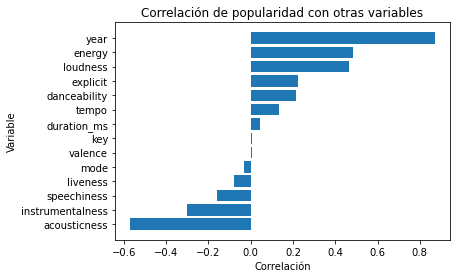

In [72]:
import matplotlib.pyplot as plt

plt.barh(y=corr_sorted.index, height=0.8, width=corr_sorted)
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.title('Correlación de popularidad con otras variables')
plt.show()

Podemos observar que hay una tendencia positiva en la popularidad de las canciones a medida que aumenta el año, la energía y el loudness. Por otro lado, hay una tendencia negativa en la popularidad a medida que disminuye la instrumentalidad y la acústica de la canción.

Vamos a observar cuáles son las canciones más populares en nuestro conjunto de datos.

In [76]:
df_populares = df_tk.sort_values('popularity', ascending=False)
df_populares[['name', 'artists','popularity']].head()


,name,artists,popularity
173647,Flowers,['Miley Cyrus'],100
19611,Dakiti,"['Bad Bunny', 'Jhay Cortez']",100
19606,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",99
173652,TQG,"['KAROL G', 'Shakira']",98
173644,Boy's a liar Pt. 2,"['PinkPantheress', 'Ice Spice']",98


Vamos a hacer un breve análisis contando el número de canciones en cada año para tener una mejor comprensión de la distribución de los datos en el conjunto.

Para una mejor comprensión del conteo, podemos agrupar el número de canciones por décadas. De esta manera, podemos ver cómo ha ido evolucionando la cantidad de canciones lanzadas en cada década.

In [75]:
# Aplicar la función para obtener la década de cada año
decadas = df_tk['year'].apply(lambda year: int(year/10)*10)

# Contar el número de observaciones por década
counts_by_decade = decadas.value_counts()

# Imprimir los resultados
print(counts_by_decade)

1970    20000
1990    19901
1950    19850
1980    19850
2010    19774
2000    19646
1960    19549
1940    15378
1930     9549
2020     5518
1920     5126
Name: year, dtype: int64


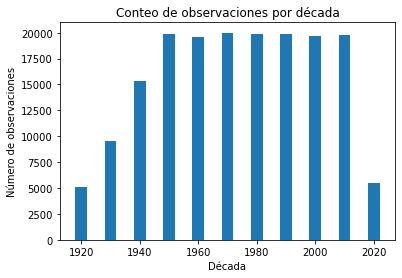

In [9]:
# Crear una gráfica de barras verticales
plt.bar(counts_by_decade.index, counts_by_decade, width=4)

# Agregar etiquetas de eje y título
plt.ylabel('Número de observaciones')
plt.xlabel('Década')
plt.title('Conteo de observaciones por década')

# Mostrar la gráfica
plt.show()

En primer lugar, vamos a analizar las variables numéricas relacionadas con las características musicales.

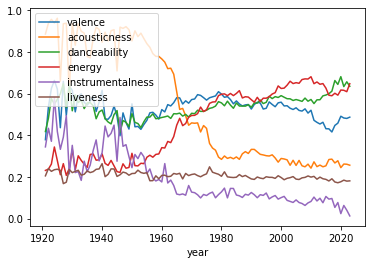

In [10]:
# Agrupar los datos por año y calcular la media
datos_anual = df_tk[numeric].groupby('year').mean()

# Mostrar una gráfica de líneas
variables = ['valence', 'acousticness', 'danceability',  'energy', 'instrumentalness','liveness']
datos_anual.plot(kind='line', y=variables)

plt.show()

 La energía de las canciones, medida en una escala del 0 al 1, ha incrementado a lo largo del tiempo, lo que podría reflejar un cambio en los gustos y preferencias de la audiencia. Por otro lado, tanto la acústica como la instrumentalización, medidas en una escala del 0 al 1, han disminuido a lo largo del tiempo, lo que podría indicar un cambio en las técnicas de producción musical y la popularidad de los instrumentos en la música moderna.

Representarlo por décadas podría ayudar a ver las tendencias con mayor claridad

<AxesSubplot:xlabel='year'>

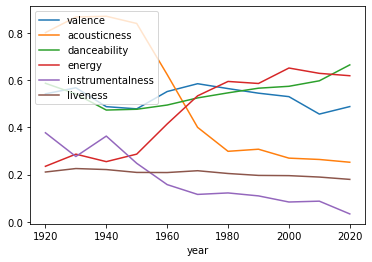

In [20]:
df_tk['year'] = df_tk['year'].apply(lambda year: int(year/10)*10)

# Agrupar los datos por año y calcular la media
datos_anual = df_tk[header].groupby('year').mean()

# Mostrar una gráfica de líneas con varias variables
variables = ['valence', 'acousticness', 'danceability',  'energy', 'instrumentalness','liveness']
datos_anual.plot(kind='line', y=variables)


<AxesSubplot:xlabel='year'>

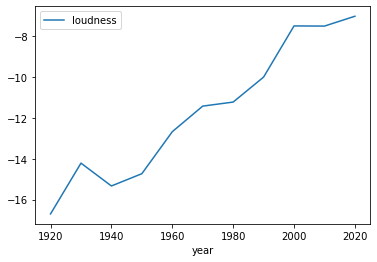

In [78]:
datos_anual.plot(kind='line', y='loudness')

El loudness también ha incrementado a lo largo de los años. Esto puede ser que la tendencia se va hacia producciones mayor presencia de elementos sonoros.

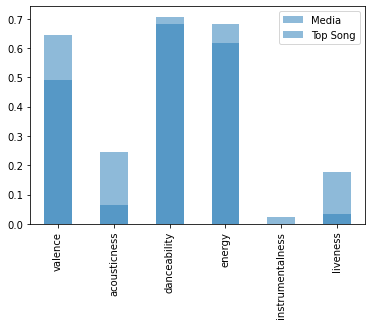

In [80]:
top_song = df_tk.loc[173647][variables]
media_año = df_tk[variables].loc[df_tk['year'] == 2020].mean()
# Transponer dataframes
media_año = media_año[variables]
top_song = top_song[variables].T

# Crea un histograma
media_año.plot(kind='bar', alpha=0.5, label='Media', legend=True)
top_song.plot(kind='bar', alpha=0.5, label='Top Song', legend=True)

# Agrega una leyenda
plt.legend()

# Muestra la gráfica
plt.show()

Comparamos la media del año actual con la canción más popular de dataset para ver si hay una tendencia clara en el conjunto de datos.